In [13]:
import pandas as pd

In [21]:
df = pd.read_csv(r'C:\Users\admin\Downloads\sample_product_data.csv')

In [22]:
df.head()

,ProductID,ProductName,Category,BasePrice,CommissionPercent,ModifiedPrice,DemandScore,Rating,SalesHistory
0,1,Tablet,Electronics,4544.56,20,5453.47,0.39,1.2,"[43, 10, 40, 49]"
1,2,Curtains,Home,3246.01,20,3895.21,0.24,2.7,"[5, 20, 46, 22]"
2,3,Curtains,Home,3548.58,20,4258.30,0.96,1.4,"[50, 25, 35, 29]"
3,4,Jacket,Fashion,1395.76,20,1674.91,0.39,2.6,"[29, 5, 14, 4]"
4,5,Eyeliner,Beauty,2985.75,20,3582.90,0.83,4.2,"[19, 34, 48, 5]"


In [23]:
df

,ProductID,ProductName,Category,BasePrice,CommissionPercent,ModifiedPrice,DemandScore,Rating,SalesHistory
0,1,Tablet,Electronics,4544.56,20,5453.47,0.39,1.2,"[43, 10, 40, 49]"
1,2,Curtains,Home,3246.01,20,3895.21,0.24,2.7,"[5, 20, 46, 22]"
2,3,Curtains,Home,3548.58,20,4258.30,0.96,1.4,"[50, 25, 35, 29]"
3,4,Jacket,Fashion,1395.76,20,1674.91,0.39,2.6,"[29, 5, 14, 4]"
4,5,Eyeliner,Beauty,2985.75,20,3582.90,0.83,4.2,"[19, 34, 48, 5]"
...,...,...,...,...,...,...,...,...,...
95,96,Dress,Fashion,3060.29,20,3672.35,0.29,2.1,"[15, 47, 10, 27]"
96,97,Magazine,Books,3965.66,20,4758.79,0.60,1.9,"[47, 39, 13, 38]"
97,98,Tablet,Electronics,1940.55,20,2328.66,0.75,2.5,"[31, 33, 27, 24]"
98,99,Laptop,Electronics,2542.20,20,3050.64,0.55,4.0,"[34, 34, 34, 39]"


In [24]:
# Group by Category and calculate average BasePrice and ModifiedPrice
avg_prices = df.groupby("Category")[["BasePrice", "ModifiedPrice"]].mean().reset_index()

In [25]:
print("Average Prices by Category:")
print(avg_prices)

Average Prices by Category:
      Category    BasePrice  ModifiedPrice
0       Beauty  2809.371250    3371.245000
1        Books  2299.883571    2759.860357
2  Electronics  2798.560769    3358.272692
3      Fashion  2699.062000    3238.873333
4         Home  2416.884667    2900.261333


In [28]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

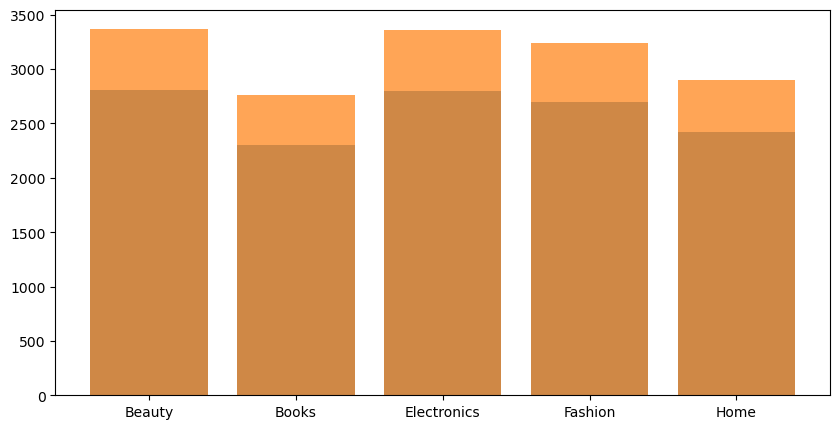

In [29]:
plt.figure(figsize=(10, 5))
plt.bar(avg_prices["Category"], avg_prices["BasePrice"], label="Base Price", alpha=0.7)
plt.bar(avg_prices["Category"], avg_prices["ModifiedPrice"], label="Modified Price", alpha=0.7)

C:\Users\admin\AppData\Local\Temp\ipykernel_25424\3974500066.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


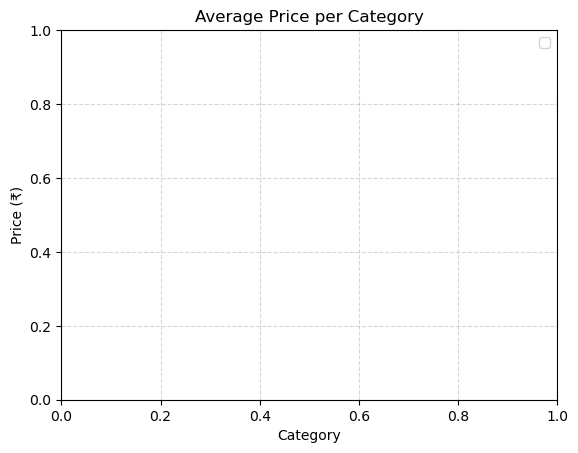

In [30]:
plt.title("Average Price per Category")
plt.xlabel("Category")
plt.ylabel("Price (₹)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

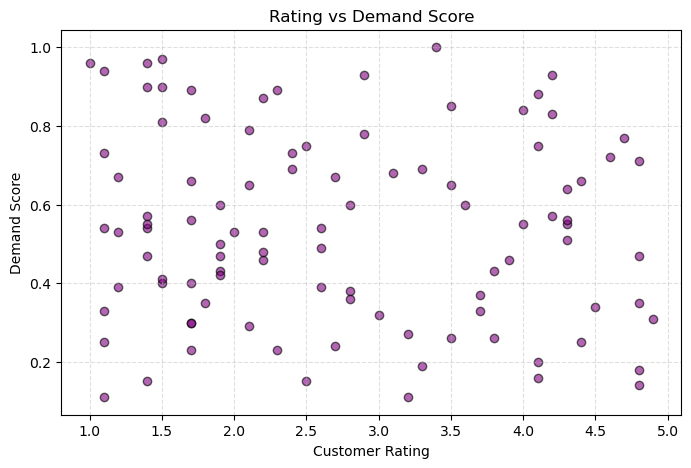

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['Rating'], df['DemandScore'], c='purple', alpha=0.6, edgecolors='k')

plt.title("Rating vs Demand Score")
plt.xlabel("Customer Rating")
plt.ylabel("Demand Score")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


Top 10 High-Demand Products:
   ProductName     Category  BasePrice  ModifiedPrice  DemandScore  Rating
20  Headphones  Electronics    3404.72        4085.66         1.00     3.4
42    Magazine        Books    1106.25        1327.50         0.97     1.5
58    Eyeliner       Beauty    4544.02        5452.82         0.96     1.0
2     Curtains         Home    3548.58        4258.30         0.96     1.4
70       Dress      Fashion    4310.70        5172.84         0.94     1.1
88    Notebook        Books    2618.76        3142.51         0.93     2.9
65  Smartwatch  Electronics    2602.63        3123.16         0.93     4.2
67    Sneakers      Fashion    4674.47        5609.36         0.90     1.4
36  Foundation       Beauty    4521.47        5425.76         0.90     1.5
16   Biography        Books    4515.07        5418.08         0.89     1.7


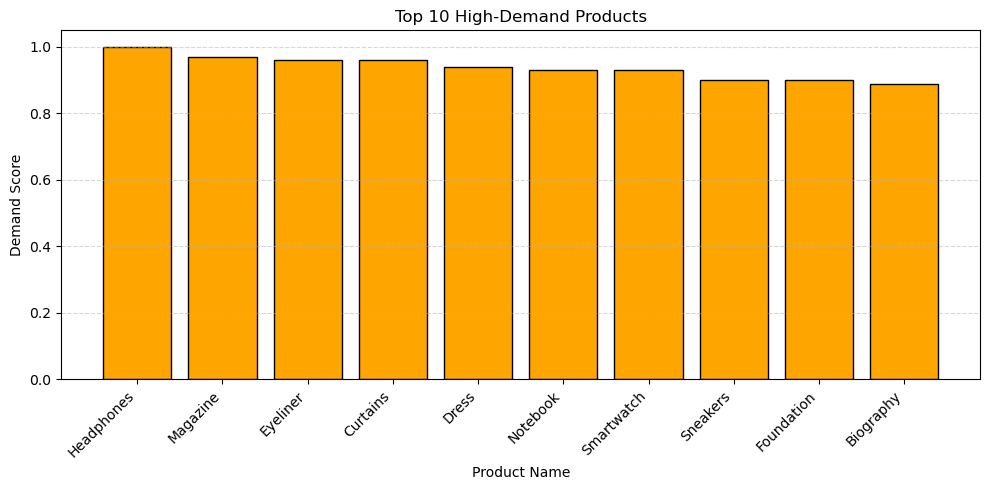

In [32]:
# Sort by DemandScore in descending order
top_demand = df.sort_values(by="DemandScore", ascending=False).head(10)

# Display the top 10 high-demand products
print("Top 10 High-Demand Products:")
print(top_demand[["ProductName", "Category", "BasePrice", "ModifiedPrice", "DemandScore", "Rating"]])

# Bar chart of top demand products
plt.figure(figsize=(10, 5))
plt.bar(top_demand["ProductName"], top_demand["DemandScore"], color='orange', edgecolor='black')
plt.title("Top 10 High-Demand Products")
plt.xlabel("Product Name")
plt.ylabel("Demand Score")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# Step 1: Convert category to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=["Category"], drop_first=True)

# Step 2: Define features (X) and label (y)
X = df_encoded[["BasePrice", "ModifiedPrice", "Rating"] + [col for col in df_encoded.columns if col.startswith("Category_")]]
y = df_encoded["DemandScore"]

In [38]:
# Step 3: Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [39]:
# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: -0.17980905422532834
Mean Squared Error: 0.04115291962043367


In [46]:
import pandas as pd

# Example: New product details
new_product = {
    "BasePrice": [1500],
    "ModifiedPrice": [1800],      # 20% markup
    "Rating": [4.2],
    "Category_Electronics": [1],
    "Category_Fashion": [0],
    "Category_Home": [0],
    "Category_Books": [0],
    "Category_Beauty": [0]
}


